In [86]:
import numpy as np

In [87]:
E_j = 10
E_l = 1
E_c = 1



In [88]:
#list the h.o. energies and solutions

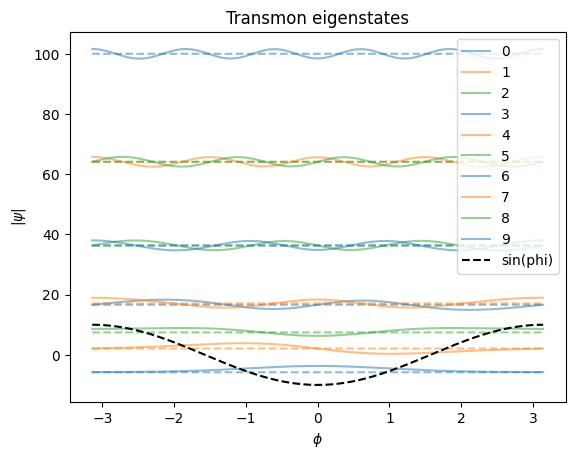

In [92]:
#find the transmon solutions
axis_phi = np.linspace(-np.pi, np.pi, 2001)
step = axis_phi[1] - axis_phi[0]

sin_phi = np.diag(np.sin(axis_phi-np.pi/2))

#next, define the derivative
ellementary = np.array([1,-2,1])/(step**2)
n_2 = np.zeros((len(axis_phi), len(axis_phi)))
for i in range(len(axis_phi)):
    ax = np.zeros(len(axis_phi))
    for j in range(3):
        index = i+j-1
        index = index % len(axis_phi)
        ax[index] = -ellementary[j]
    n_2[i] = ax


H = 4*E_c*n_2 + E_j*sin_phi
#diagonalize the Hamiltonian

Es, vecs = np.linalg.eigh(H)

#rempve phases of eigenvecs
for i in range(len(vecs)):
    phase = 1
    for j in range(len(vecs[:,i])):
        if not np.isclose(vecs[:,i][j], 0):
            phase = vecs[:,i][j] / np.abs(vecs[:,i][j])
            break
    vecs[:,i] /= phase

#plot the eigenvectors
import matplotlib.pyplot as plt
plt.figure()
cs = ["tab:blue", "tab:orange", "tab:green"]
for i in range(10):
    plt.plot(axis_phi, vecs[:,i]*5e1+Es[i], label=str(i), alpha=0.5, color=cs[i%3])
    plt.plot(axis_phi, [Es[i]]*len(axis_phi), alpha=0.5, linestyle='--', color=cs[i%3])
plt.plot(axis_phi,np.diag(sin_phi*E_j), label='sin(phi)', color='black', linestyle='--')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$|\psi|$')
plt.legend()
plt.title('Transmon eigenstates')
plt.show()


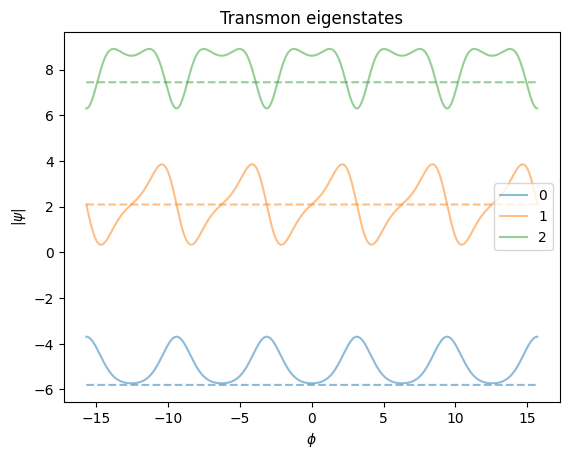

In [93]:
#extend these states by their periodicity
repeats = 5
eigenvecs = [np.array([eig]*repeats).flatten() for eig in vecs.T]
shift = -round(np.pi/step)
for i in range(len(eigenvecs)):
    new = np.zeros(len(eigenvecs[i]))
    for j in range(len(eigenvecs[i])):
        new[j] = eigenvecs[i][(j-shift%len(eigenvecs[i]))]
    eigenvecs[i] = new
#plot the eigenvectors
plt.figure()
axis_phi = np.linspace(-np.pi*repeats, np.pi*repeats, len(eigenvecs[0]))
for i in range(3):
    plt.plot(axis_phi, eigenvecs[i]*5e1+Es[i], label=str(i), alpha=0.5, color=cs[i])
    plt.plot(axis_phi, [Es[i]]*len(axis_phi), alpha=0.5, linestyle='--', color=cs[i])
#plt.plot(axis_phi,np.diag(sin_phi*E_j), label='sin(phi)', color='black', linestyle='--')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$|\psi|$')
plt.legend()
plt.title('Transmon eigenstates')
plt.show()


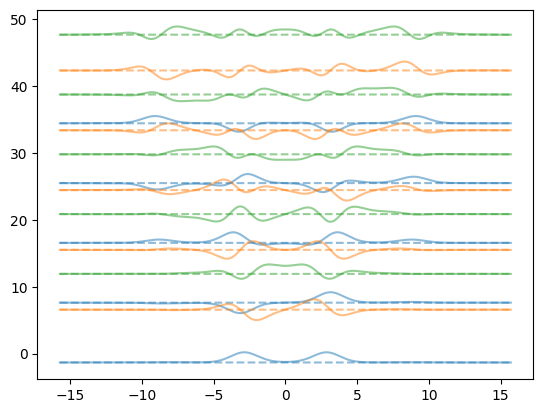

In [ ]:
#def a harmonic oscilator solution
def hermite_polynomial(x, n):
    if n == 0:
        return np.ones(len(x))
    elif n == 1:
        return 2*x
    elif n == 2:
        return 4*x**2 - 2
    elif n == 3:
        return 8*x**3 - 12*x
    elif n == 4:
        return 16*x**4 - 48*x**2 + 12
    elif n == 5:
        return 32*x**5 - 160*x**3 + 120*x
    else:
        raise ValueError("n must be between 0 and 5")
def ho_solution(x, n):
    env = np.exp(-x**2/2)
    pol = hermite_polynomial(x, n)
    func = env * pol
    norm = np.sqrt(np.sum(func**2))
    return func/norm


flux_sols = []
for i in range(len(eigenvecs[:3])):
    flux_sols.append([])
    for j in range(5):
        flux_sols[-1].append(ho_solution(axis_phi/np.pi, j)*eigenvecs[i])
        norm = np.sqrt(np.sum(flux_sols[-1][-1]**2))
        flux_sols[-1][-1] /= norm
flux_sols = np.array(flux_sols)

omega = 2*np.sqrt(2*E_c*E_j)

#plot
plt.figure()
for i in range(len(flux_sols)):
    for j in range(len(flux_sols[i])):
        plt.plot(axis_phi, flux_sols[i][j]*5e1+(Es[i]+omega*(1/2+j)), label=f"{i},{j}", alpha=0.5, color=cs[i])
        plt.plot(axis_phi, [(Es[i]+omega*(1/2+j))]*len(axis_phi), alpha=0.5, linestyle='--', color=cs[i])


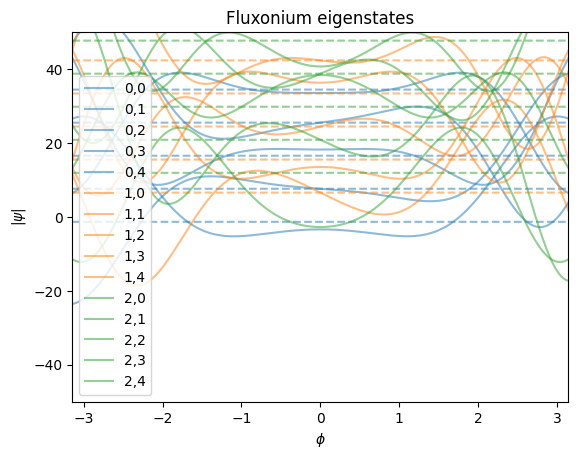

In [106]:
#apply the hammiltopnian on the found functions
cos_phi = np.diag(np.cos(axis_phi-np.pi))
phi_2 = np.diag(axis_phi**2)
ellementary = np.array([1,-2,1])/(step**2)
n_2 = np.zeros((len(axis_phi), len(axis_phi)))
for i in range(len(axis_phi)):
    ax = np.zeros(len(axis_phi))
    for j in range(3):
        index = i+j-1
        #index = index % len(axis_phi)
        if index < 0:
            continue
        if index >= len(axis_phi):
            continue
        ax[index] = -ellementary[j]
    n_2[i] = ax
H = 4*E_c*n_2 + E_j*cos_phi + 0.5*E_l*phi_2



flux_sols_H = []
for i in range(len(flux_sols)):
    flux_sols_H.append([])
    for j in range(len(flux_sols[i])):
        flux_sols_H[-1].append(np.dot(H, flux_sols[i][j]))
        #norm = np.sqrt(np.sum(flux_sols_H[-1][-1]**2))
        #flux_sols_H[-1][-1] /= norm

#plot
plt.figure()
for i in range(len(flux_sols_H)):
    for j in range(len(flux_sols_H[i])):
        plt.plot(axis_phi, flux_sols_H[i][j]*5e1+(Es[i]+omega*(1/2+j)), label=f"{i},{j}", alpha=0.5, color=cs[i])
        plt.plot(axis_phi, [(Es[i]+omega*(1/2+j))]*len(axis_phi), alpha=0.5, linestyle='--', color=cs[i])
plt.xlabel(r'$\phi$')
plt.ylabel(r'$|\psi|$')
plt.legend()
plt.title('Fluxonium eigenstates')
plt.xlim(-np.pi, np.pi)
plt.ylim(-5e1, 5e1)
plt.show()

In [108]:

deltas = []
for i in range(len(flux_sols_H)):
    deltas.append([])
    for j in range(len(flux_sols_H[i])):
        delta = np.dot(flux_sols_H[i][j].conj(), flux_sols[i][j])
        deltas[-1].append(delta)
print(deltas)

[[np.float64(13.996382742282819), np.float64(15.901070016470076), np.float64(21.051414759152472), np.float64(28.597328520598257), np.float64(34.26089512538423)], [np.float64(11.944653733545548), np.float64(17.660757947555418), np.float64(20.27055089773718), np.float64(24.302726224500738), np.float64(38.84649745908152)], [np.float64(3.1017520509414798), np.float64(17.899119196935782), np.float64(11.90990386508792), np.float64(17.607073101429293), np.float64(27.49867436892614)]]
